세 가지 예제인 영화 리뷰 예측, 토픽 분류, 주택 가격 회귀 모두 홀드아웃 데이터에서 모델의 성능이 몇 번의 에포크 후에 최고치에 다다랐다가 감소되기 시작했습니다. 즉, 모델이 금방 훈련 데이터에 과대적합되기 시작합니다. 과대적합은 모든 머신 러닝 문제에서 발생합니다. 머신 러닝을 마스터하려면 과대적합을 다루는 방법을 꼭 배워야 합니다.

머신 러닝의 근본적인 이슈는 최적화와 일반화 사이의 줄다리기입니다. 최적화는 가능한 훈련 데이터에서 최고의 성능을 얻으려고 모델을 조정하는 과정입니다(머신 러닝의 학습). 반면 일반화는 훈련된 모델이 이전에 본 적 없는 데이터에서 얼마나 잘 수행되는지를 의미합니다. 물론 모델을 만드는 목적은 좋은 일반화 성능을 얻는 것입니다. 하지만 일반화 성능을 제어할 방법이 없습니다. 단지 훈련 데이터를 기반으로 모델을 조정할 수만 있습니다.

과대적합 해결
- 더 많은 훈련 데이터
- 정보의 양을 조절하거나 저장할 수 있는 정보에 제약
- 파리미터 수가 적은 모델 선택(단순한 모델)
- 훈련 데이터의 특성 수 축소
- 모델의 제약(특정 파라미터가 큰 값을 가지지 못하도록 함
- 훈련데이터의 잡음을 줄인다(오류데이터 수정하고 이상치 제거)

과소적합 해결
- 더 복잡한 모델 선택
- 훈련데이터의 특성을 더 선택
- 모델의 제약을 줄인다.


In [1]:
from keras.datasets import imdb
import warnings
warnings.filterwarnings('ignore')

(train_data, train_labels),(test_data, test_labels) = imdb.load_data(num_words = 10000)

17473536/17464789 [==============================] - 0s 0us/step


In [2]:
import numpy as np

def vectorize_sequences(sequences, dimension = 10000):
  results = np.zeros((len(sequences),dimension))
  for i, sequence in enumerate(sequences):
    results[i,sequence] = 1.
    # results[i]에서 sequence3가 있는 특정 인덱스의 위치를 1로 만든다
  return results

x_train = vectorize_sequences(train_data)

x_test = vectorize_sequences(test_data)

In [3]:
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

In [4]:
from tensorflow.keras import models, layers

model = models.Sequential()

model.add(layers.Dense(16,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [5]:
model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

In [6]:
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [7]:
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 47ms/step - loss: 0.5036 - accuracy: 0.7830 - val_loss: 0.3782 - val_accuracy: 0.8663
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.2952 - accuracy: 0.9063 - val_loss: 0.3103 - val_accuracy: 0.8795
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.2178 - accuracy: 0.9298 - val_loss: 0.2787 - val_accuracy: 0.8897
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1776 - accuracy: 0.9420 - val_loss: 0.3014 - val_accuracy: 0.8776
Epoch 5/20
30/30 [==============================] - 1s 33ms/step - loss: 0.1417 - accuracy: 0.9547 - val_loss: 0.2868 - val_accuracy: 0.8859
Epoch 6/20
30/30 [==============================] - 1s 34ms/step - loss: 0.1199 - accuracy: 0.9626 - val_loss: 0.3113 - val_accuracy: 0.8801
Epoch 7/20
30/30 [==============================] - 1s 34ms/step - loss: 0.0992 - accuracy: 0.9703 - val_loss: 0.3137 - val_accuracy: 0.8805
Epoch 8/20
30

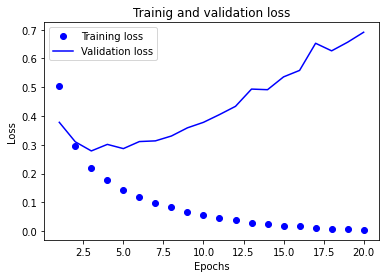

In [8]:
import matplotlib.pyplot as plt
history_dict = history.history
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Trainig and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

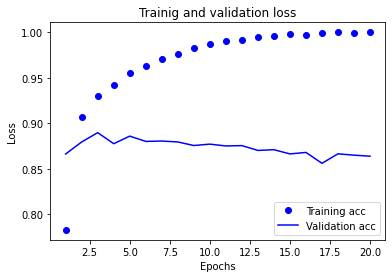

In [9]:
plt.clf()

history_dict = history.history
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

epochs = range(1, len(loss)+1)

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Trainig and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [10]:
model = models.Sequential()

model.add(layers.Dense(16,activation='relu',input_shape = (10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])

model.fit(x_train,y_train,epochs=4,batch_size = 512)
results = model.evaluate(x_test,y_test)

Epoch 1/4
49/49 [==============================] - 2s 28ms/step - loss: 0.4479 - accuracy: 0.8270
Epoch 2/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2589 - accuracy: 0.9108
Epoch 3/4
49/49 [==============================] - 1s 28ms/step - loss: 0.2010 - accuracy: 0.9272
Epoch 4/4
782/782 [==============================] - 2s 2ms/step - loss: 0.3184 - accuracy: 0.8748


In [11]:
model.predict(x_test)

array([[0.13265672],
       [0.99980116],
       [0.52073824],
       ...,
       [0.07557192],
       [0.03936145],
       [0.3528742 ]], dtype=float32)

Epoch 1/20
30/30 [==============================] - 2s 61ms/step - loss: 0.6162 - accuracy: 0.6613 - val_loss: 0.5625 - val_accuracy: 0.7681
Epoch 2/20
30/30 [==============================] - 1s 34ms/step - loss: 0.5171 - accuracy: 0.8075 - val_loss: 0.5157 - val_accuracy: 0.8065
Epoch 3/20
30/30 [==============================] - 1s 33ms/step - loss: 0.4670 - accuracy: 0.8658 - val_loss: 0.4959 - val_accuracy: 0.8127
Epoch 4/20
30/30 [==============================] - 1s 34ms/step - loss: 0.4330 - accuracy: 0.8968 - val_loss: 0.4759 - val_accuracy: 0.8481
Epoch 5/20
30/30 [==============================] - 1s 32ms/step - loss: 0.4071 - accuracy: 0.9183 - val_loss: 0.4728 - val_accuracy: 0.8482
Epoch 6/20
30/30 [==============================] - 1s 33ms/step - loss: 0.3854 - accuracy: 0.9335 - val_loss: 0.4536 - val_accuracy: 0.8793
Epoch 7/20
30/30 [==============================] - 1s 32ms/step - loss: 0.3674 - accuracy: 0.9449 - val_loss: 0.4714 - val_accuracy: 0.8522
Epoch 8/20
30

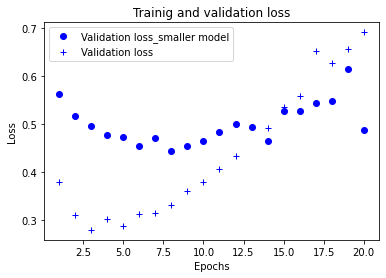

In [14]:
# 더 작은 네트워크 적용

model2 = models.Sequential()

model2.add(layers.Dense(6,activation='relu',input_shape = (10000,)))
model2.add(layers.Dense(6,activation='relu'))
model2.add(layers.Dense(1,activation='sigmoid'))

model2.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history2 = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

history_dict2 = history2.history
loss2 = history_dict2['loss']
val_loss2 = history_dict2['val_loss']

epochs = range(1, len(loss)+1)


plt.plot(epochs, val_loss2, 'bo', label='Validation loss_smaller model')
plt.plot(epochs, val_loss, 'b+', label='Validation loss')
plt.title('Trainig and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/20
30/30 [==============================] - 19s 610ms/step - loss: 0.5918 - accuracy: 0.7353 - val_loss: 0.3157 - val_accuracy: 0.8829
Epoch 2/20
30/30 [==============================] - 17s 580ms/step - loss: 0.2417 - accuracy: 0.9092 - val_loss: 0.4590 - val_accuracy: 0.8111
Epoch 3/20
30/30 [==============================] - 18s 610ms/step - loss: 0.1857 - accuracy: 0.9372 - val_loss: 0.2687 - val_accuracy: 0.8889
Epoch 4/20
30/30 [==============================] - 18s 594ms/step - loss: 0.0778 - accuracy: 0.9741 - val_loss: 0.2933 - val_accuracy: 0.8825
Epoch 5/20
30/30 [==============================] - 18s 607ms/step - loss: 0.0063 - accuracy: 0.9995 - val_loss: 0.4569 - val_accuracy: 0.8875
Epoch 6/20
30/30 [==============================] - 17s 584ms/step - loss: 3.1776e-04 - accuracy: 1.0000 - val_loss: 0.5616 - val_accuracy: 0.8883
Epoch 7/20
30/30 [==============================] - 17s 579ms/step - loss: 3.7418e-05 - accuracy: 1.0000 - val_loss: 0.6480 - val_accuracy

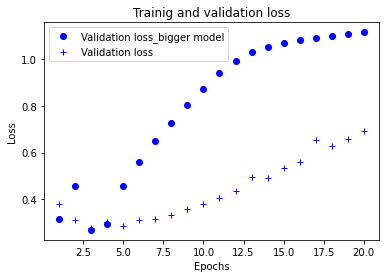

In [15]:
# 더 큰 네트워크 적용

model3 = models.Sequential()

model3.add(layers.Dense(1024,activation='relu',input_shape = (10000,)))
model3.add(layers.Dense(1024,activation='relu'))
model3.add(layers.Dense(1,activation='sigmoid'))

model3.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history3 = model3.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

history_dict3 = history3.history
loss3 = history_dict3['loss']
val_loss3 = history_dict3['val_loss']

epochs = range(1, len(loss)+1)


plt.plot(epochs, val_loss3, 'bo', label='Validation loss_bigger model')
plt.plot(epochs, val_loss, 'b+', label='Validation loss')
plt.title('Trainig and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()


Epoch 1/20
30/30 [==============================] - 2s 48ms/step - loss: 0.5641 - accuracy: 0.7831 - val_loss: 0.4245 - val_accuracy: 0.8725
Epoch 2/20
30/30 [==============================] - 1s 35ms/step - loss: 0.3562 - accuracy: 0.8973 - val_loss: 0.3496 - val_accuracy: 0.8870
Epoch 3/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2800 - accuracy: 0.9253 - val_loss: 0.3697 - val_accuracy: 0.8656
Epoch 4/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2475 - accuracy: 0.9345 - val_loss: 0.3486 - val_accuracy: 0.8788
Epoch 5/20
30/30 [==============================] - 1s 35ms/step - loss: 0.2243 - accuracy: 0.9436 - val_loss: 0.3254 - val_accuracy: 0.8868
Epoch 6/20
30/30 [==============================] - 1s 36ms/step - loss: 0.2081 - accuracy: 0.9488 - val_loss: 0.3590 - val_accuracy: 0.8769
Epoch 7/20
30/30 [==============================] - 1s 36ms/step - loss: 0.1939 - accuracy: 0.9555 - val_loss: 0.3385 - val_accuracy: 0.8829
Epoch 8/20
30

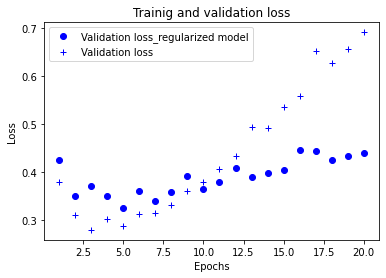

In [16]:
# 가중치 규제 추가
from tensorflow.keras import regularizers

model4 = models.Sequential()

model4.add(layers.Dense(16,kernel_regularizer = regularizers.l2(0.001),activation='relu',input_shape = (10000,)))
model4.add(layers.Dense(16,kernel_regularizer = regularizers.l2(0.001),activation='relu'))
model4.add(layers.Dense(1,activation='sigmoid'))

model4.compile(optimizer='rmsprop',
              loss = 'binary_crossentropy',
              metrics = ['accuracy'])
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]
history4 = model4.fit(partial_x_train,
                    partial_y_train,
                    epochs = 20,
                    batch_size = 512,
                    validation_data = (x_val,y_val))

history_dict4 = history4.history
loss4 = history_dict4['loss']
val_loss4 = history_dict4['val_loss']

epochs = range(1, len(loss)+1)


plt.plot(epochs, val_loss4, 'bo', label='Validation loss_regularized model')
plt.plot(epochs, val_loss, 'b+', label='Validation loss')
plt.title('Trainig and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()